In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        filepath=os.path.join(dirname, filename)
        if filename.endswith('.csv'):
            df=pd.read_csv(filepath)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.021159,0.021566,0.021159,0.021484,0.011664,7526400
1,1972-08-28,0.021484,0.021647,0.021403,0.021403,0.011620,2918400
2,1972-08-29,0.021322,0.021322,0.021159,0.021159,0.011488,5836800
3,1972-08-30,0.021159,0.021159,0.020996,0.021159,0.011488,1228800
4,1972-08-31,0.020996,0.020996,0.020833,0.020833,0.011311,2611200


In [3]:
df.shape

(13145, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.nunique().count()

7

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,13145.000000,13145.000000,13145.000000,13145.000000,13145.000000,1.314500e+04
mean,13.913759,14.039233,13.789989,13.916968,11.440069,2.248237e+07
std,15.292915,15.411965,15.178640,15.298209,14.545202,1.843446e+07
min,0.005208,0.005208,0.004801,0.005208,0.002845,0.000000e+00
25%,0.540365,0.544271,0.537760,0.540365,0.322560,1.190220e+07
50%,10.500000,10.687500,10.239583,10.489583,6.738105,1.880670e+07
75%,19.836666,20.041668,19.670000,19.870001,14.260414,2.810160e+07
max,81.040001,81.599998,80.680000,81.400002,81.400002,3.955008e+08


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

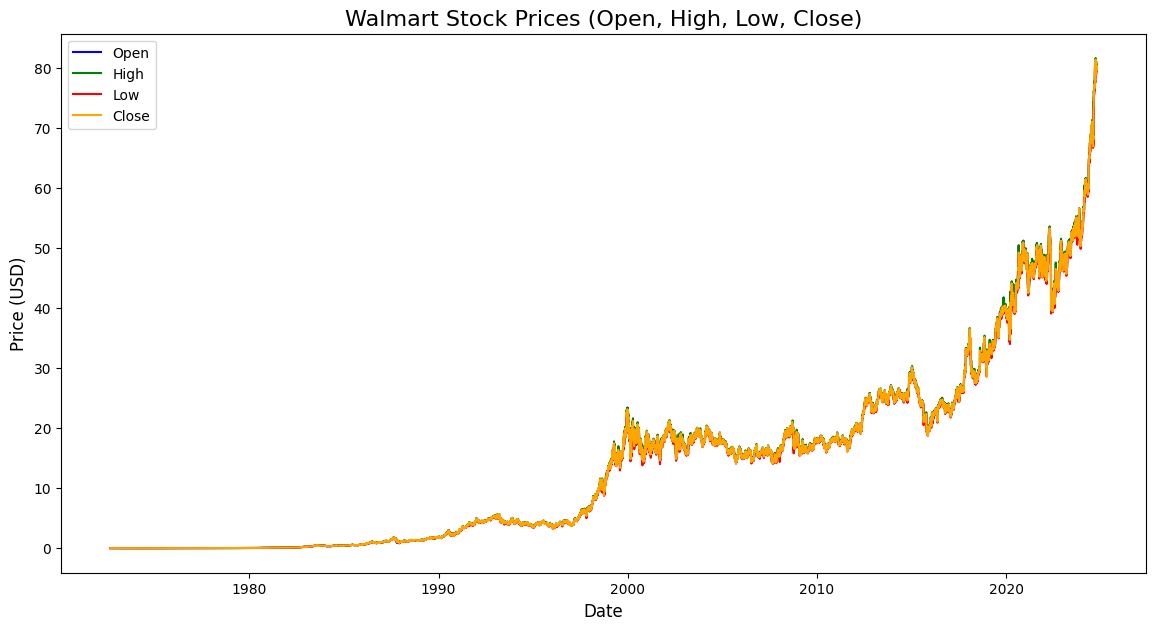

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Open'], label='Open', color='blue')
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.plot(df['Date'], df['Close'], label='Close', color='orange')
plt.title('Walmart Stock Prices (Open, High, Low, Close)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.show()

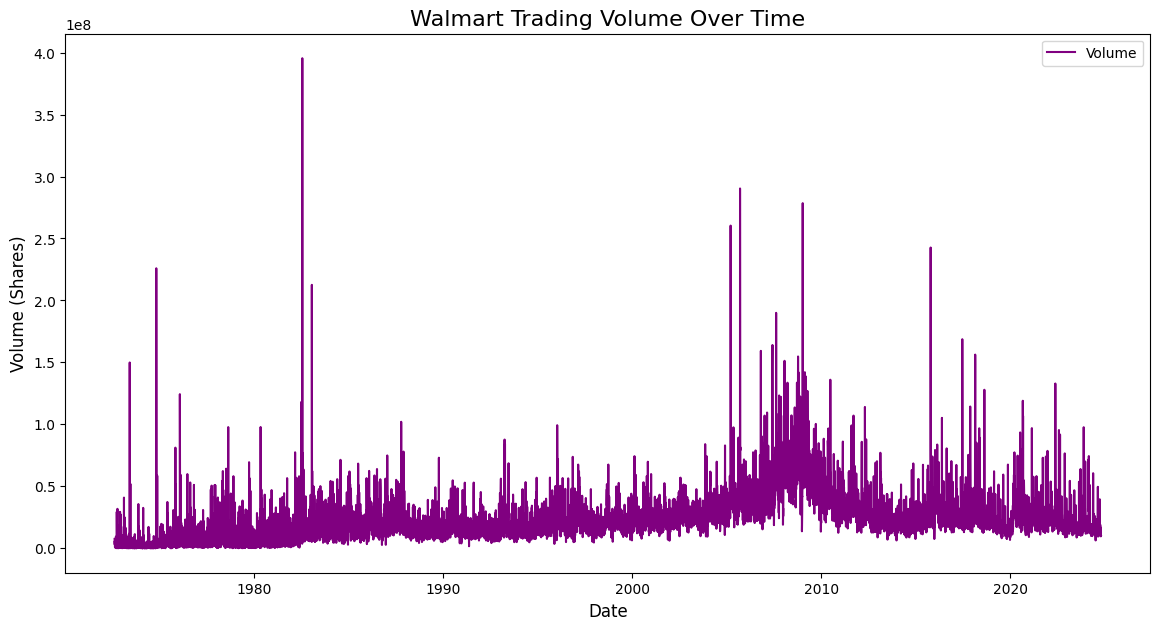

In [10]:
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Volume'], label='Volume', color='purple')
plt.title('Walmart Trading Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume (Shares)', fontsize=12)
plt.legend()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


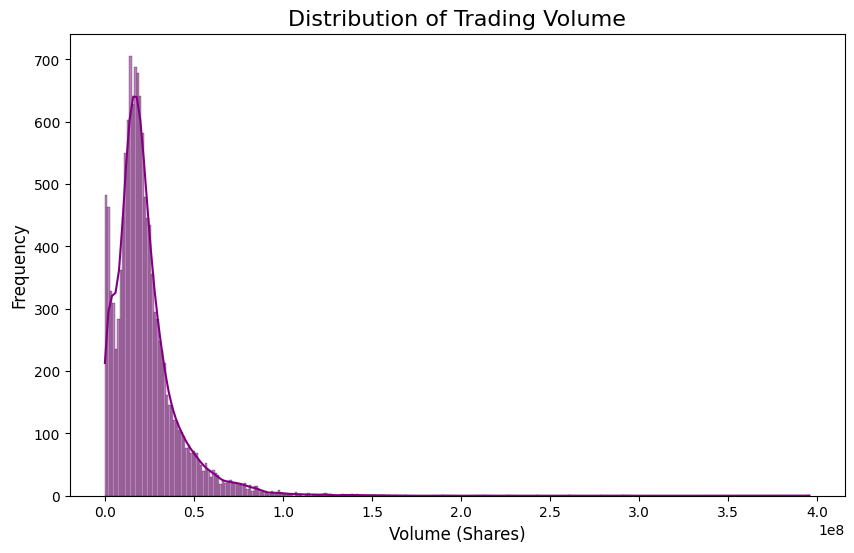

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['Volume'], kde=True, color='purple')
plt.title('Distribution of Trading Volume', fontsize=16)
plt.xlabel('Volume (Shares)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [15]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

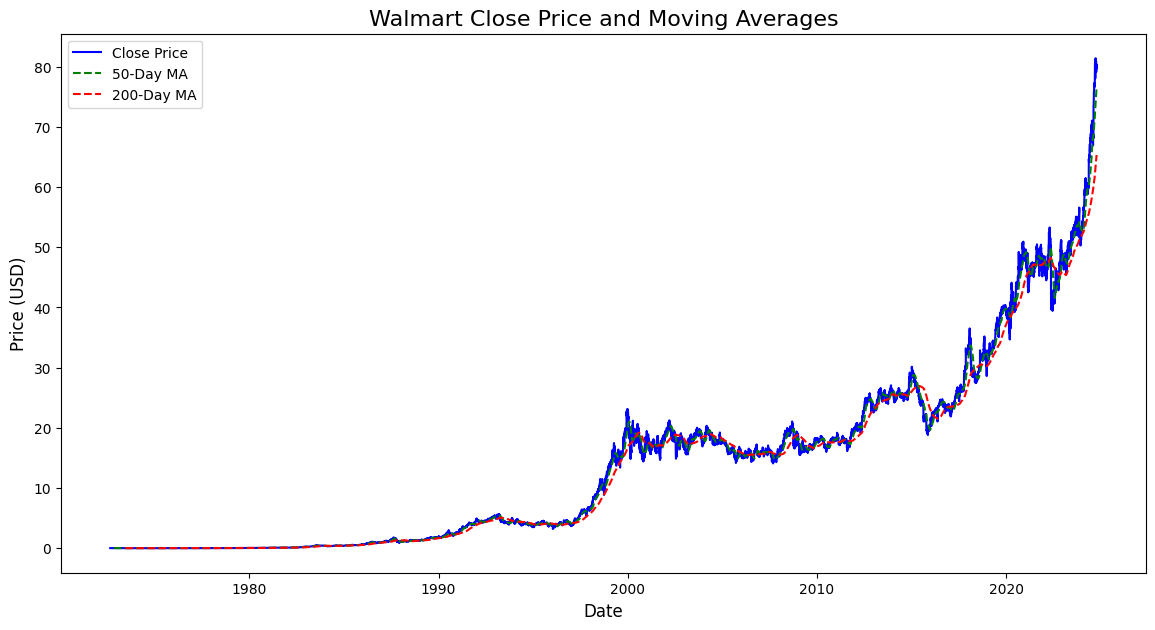

In [16]:
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['50_MA'], label='50-Day MA', color='green', linestyle='--')
plt.plot(df['Date'], df['200_MA'], label='200-Day MA', color='red', linestyle='--')
plt.title('Walmart Close Price and Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.show()

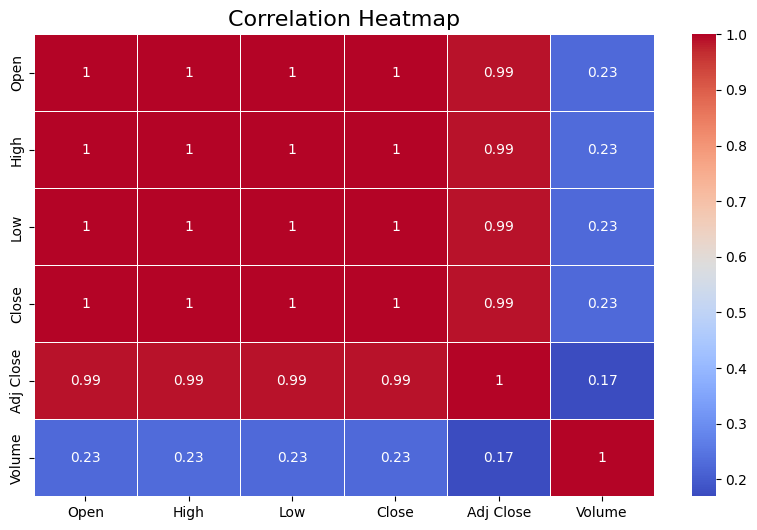

In [17]:
plt.figure(figsize=(10,6))
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()